Thygarajan N.


Object detection using YOLOv3

In [1]:
# Import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Prepare the yolo model using pre trained weights
net = cv2.dnn.readNet('yolov3.weights' , 'yolov3.cfg')

In [3]:
classes = []
with open('coco.names','r') as f:
    classes = f.read().splitlines()

In [4]:
plt.rcParams['figure.figsize'] = [24.0, 14.0]
img = cv2.imread('images\person.jpg')
height,width,_ = img.shape

In [5]:
##Preparing the image for YOLO
#Scale the image by 255
#Resize the image to 416*416
#Make the image into RGB format
blob = cv2.dnn.blobFromImage(img , 1/255 , (416,416) , (0,0,0) , swapRB=True , crop=False)
net.setInput(blob)

In [6]:
# Perform forward pass 
output_layers_names = net.getUnconnectedOutLayersNames()
layersOutputs = net.forward(output_layers_names)

In [7]:
#Visualizing the yolo outputs 
#yolo will output a vector of 85 elements containing bounding box and class information
boxes = []
confidences = []
class_ids = []
for output in layersOutputs:
    for detection in output:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x = int(detection[0]*width)
            center_y = int(detection[1]*height)
            w  = int(detection[2]*width)
            h  = int(detection[3]*height)
            
            x  = int(center_x - w/2)
            y  = int(center_y - h/2)
            
            boxes.append([x , y , w, h])
            confidences.append((float(confidence)))
            class_ids.append(class_id)
        

In [8]:
#Applying Non-max suppression 
indexes = cv2.dnn.NMSBoxes(boxes , confidences , 0.5 , 0.4)

In [9]:
#create bounding boxes and put them on the image
font = cv2.FONT_HERSHEY_PLAIN
colours = np.random.uniform(0,255,size=((len(boxes),3)))
for i in indexes.flatten():
    x,y,w,h = boxes[i]
    label = str(classes[class_ids[i]])
    confidence = str(round(confidences[i],2))
    colour = colours[i]
    cv2.rectangle(img,(x,y),(x+w , y+h), colour , 2)
    cv2.putText(img , label + " "+ confidence , (x , y+20) , font , 2 , (255,255,255) , 2)

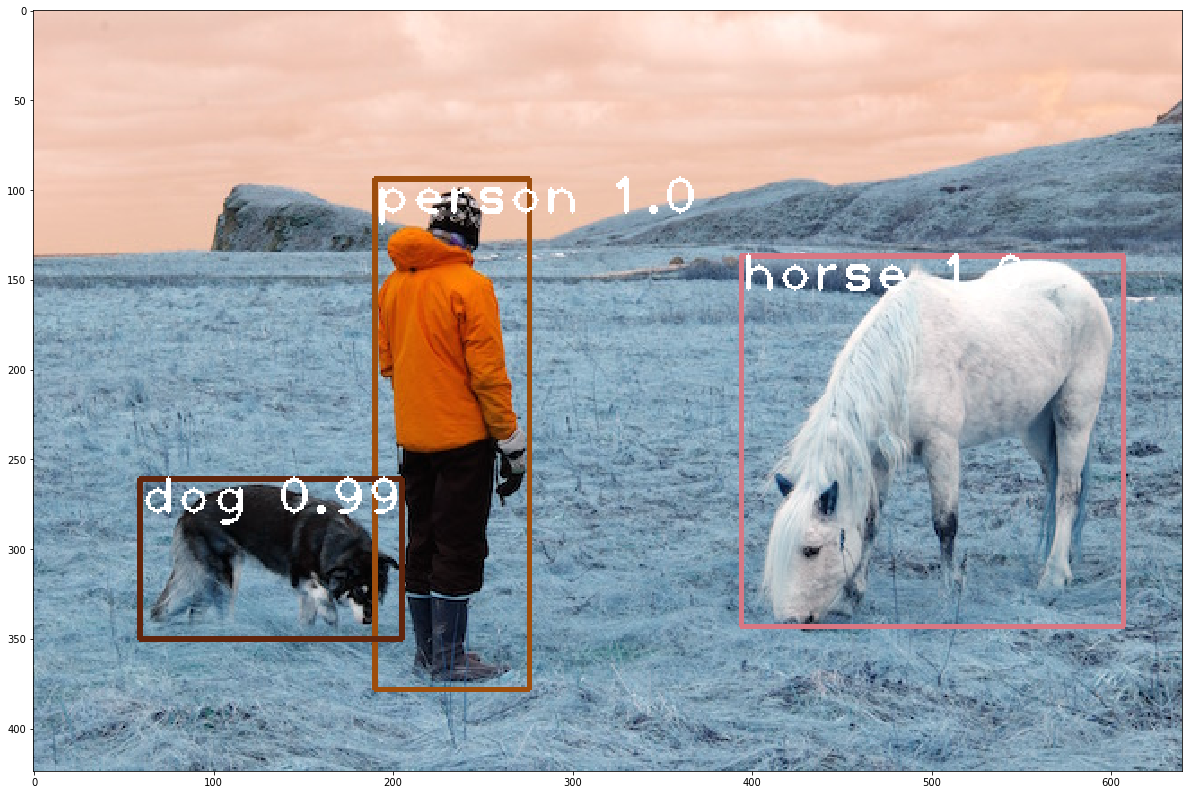

In [10]:
#Output image with objects detected with bounding boxes
plt.imshow(img)